## 문제 설명
- ROR 게임은 두 팀으로 나누어서 진행하며, 상대 팀 진영을 먼저 파괴하면 이기는 게임입니다. 따라서, 각 팀은 상대 팀 진영에 최대한 빨리 도착하는 것이 유리합니다.

- 지금부터 당신은 한 팀의 팀원이 되어 게임을 진행하려고 합니다. 다음은 5 x 5 크기의 맵에, 당신의 캐릭터가 (행: 1, 열: 1) 위치에 있고, 상대 팀 진영은 (행: 5, 열: 5) 위치에 있는 경우의 예시입니다.

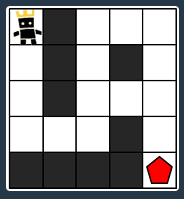

- 위 그림에서 검은색 부분은 벽으로 막혀있어 갈 수 없는 길이며, 흰색 부분은 갈 수 있는 길입니다. 캐릭터가 움직일 때는 동, 서, 남, 북 방향으로 한 칸씩 이동하며, 게임 맵을 벗어난 길은 갈 수 없습니다.
아래 예시는 캐릭터가 상대 팀 진영으로 가는 두 가지 방법을 나타내고 있습니다.

    - 첫 번째 방법은 11개의 칸을 지나서 상대 팀 진영에 도착했습니다.

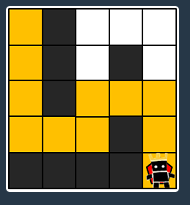


    - 두 번째 방법은 15개의 칸을 지나서 상대팀 진영에 도착했습니다.
    
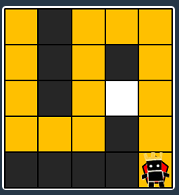


- 위 예시에서는 첫 번째 방법보다 더 빠르게 상대팀 진영에 도착하는 방법은 없으므로, 이 방법이 상대 팀 진영으로 가는 가장 빠른 방법입니다.

- 만약, 상대 팀이 자신의 팀 진영 주위에 벽을 세워두었다면 상대 팀 진영에 도착하지 못할 수도 있습니다. 예를 들어, 다음과 같은 경우에 당신의 캐릭터는 상대 팀 진영에 도착할 수 없습니다.

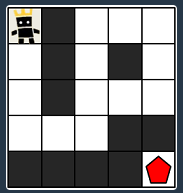

- 게임 맵의 상태 maps가 매개변수로 주어질 때, 캐릭터가 상대 팀 진영에 도착하기 위해서 지나가야 하는 칸의 개수의 최솟값을 return 하도록 solution 함수를 완성해주세요. 단, 상대 팀 진영에 도착할 수 없을 때는 -1을 return 해주세요.

## 제한사항
- maps는 n x m 크기의 게임 맵의 상태가 들어있는 2차원 배열로, n과 m은 각각 1 이상 100 이하의 자연수입니다.
    - n과 m은 서로 같을 수도, 다를 수도 있지만, n과 m이 모두 1인 경우는 입력으로 주어지지 않습니다.
- maps는 0과 1로만 이루어져 있으며, 0은 벽이 있는 자리, 1은 벽이 없는 자리를 나타냅니다.
- 처음에 캐릭터는 게임 맵의 좌측 상단인 (1, 1) 위치에 있으며, 상대방 진영은 게임 맵의 우측 하단인 (n, m) 위치에 있습니다.

In [7]:
maps = [[1,0,1,1,1],
        [1,0,1,0,1],
        [1,0,1,1,1],
        [1,1,1,0,1],
        [0,0,0,0,1]]
# maps의 결과는 11이 나와야 합니다.

# maps1 = [[1,0,1,1,1],[1,0,1,0,1],[1,0,1,1,1],[1,1,1,0,0],[0,0,0,0,1]]
# maps1의 결과는 -1이 나와야 합니다.

In [8]:
def solution(maps):
    
    # 현제 위치에서 상, 하, 좌, 우를 모두 들여다보고 계산해야합니다.
    # d_row와 d_col을 통해 들여다 봅니다.
    d_row = [ -1, 1,  0, 0 ]
    d_col = [  0, 0, -1, 1 ]
    
    # 상대방 진영은 항상 맵의 우측 하단에 위치합니다.
    # maps의 길이와 maps[0]의 길이로 maps의 행과 열을 알 수 있습니다.
    n = len(maps)
    m = len(maps[0])
    
    # queue라는 리스트를 만들어 줍니다.
    queue = list()
    
    # 항상 처음 시작은 maps의 좌측 상단입니다.
    # maps[0][0] 에서 시작하기에 queue에 0,0을 튜플로 집어 넣습니다.
    # queue = (0,0) 으로 시작합니다.
    queue.append( (0,0) )

    # while문으로 queue가 True일때 계속 반복 합니다.
    # 즉 queue의 요소가 존재하지 않으면 해당 while문은 종료 됩니다.
    while queue:
        
        # queue의 첫번째 요소를 빼내 row와 col에 할당합니다.
        # queue는 0,0의 튜플로 들어가 있기에 row와 col에 각각 0이 들어갑니다.
        row, col = queue.pop(0)
        
        
        # for문을 돌려 maps에 row와 col의 위치에서
        # 상, 하, 좌, 우를 하나씩 들여다 봅니다.
        for i in range(4):
            
            # 이때 현재 위치 row,col에 d_row[i], d_col[i]가 각각 더해져서
            # 상, 하, 좌, 우인 c_row, c_col이 됩니다.
            c_row = row + d_row[i]
            c_col = col + d_col[i]
            
            # c_row, c_col의 위치는 해당 maps의 범위를 벗어나선 안됩니다.
            # is_out변수를 만들어 maps를 벗어나는 경우를 만들어 이 중 하나라도
            # 해당되면 is_out에 값이 들어가게 됩니다.
            is_out = any( [ c_row < 0, c_row >= n, c_col < 0, c_col >= m ] )
            
            # 현재 위치에서 상, 하, 좌, 우를 돌려보면서
            
            # 만약 is_out에 값이 들어간 True라면 maps의 범위를 벗어났다는 말이 되므로
            # continue로 그냥 넘어갑니다. 
            if is_out :
                continue
                
            # 문제에서 0인 곳은 벽이 있는 자리입니다.
            # 벽이있는 자리는 갈 수 없으므로
            # 상, 하, 좌, 우를 하나씩 들여다 보며 0이있으면 continue로 그냥 넘어갑니다.
            if maps[c_row][c_col] == 0:
                continue 
                
            # 만약 상, 하, 좌, 우를 살펴보다가 1이 감지되면
            if maps[c_row][c_col] == 1:
                # 이동하기 전 위치의 값에 1을 더한값을 이동한 위치에 1대신 집어 넣습니다.
                maps[c_row][c_col] = maps[row][col] + 1
                
                # 그리고 이동한 위치의 위치 값을 queue에 집어넣습니다.
                queue.append( (c_row, c_col) )
            # 한 위치의 상, 하, 좌, 우 탐색이 끝났으면 다음 위치로 넘어 갑니다.
    
    # 만약 maps의 맨 우측 하단의 값이 1이 아니면
    # 시작위치에서 마지막위치 까지 찾아 왔다는 뜻이므로 maps의 우측하단의 값을 출력합니다.
    # 하지만 그대로 1이면 상대팀 진영에 도착하지 못했다는 뜻이므로
    # -1을 배출합니다.
    return maps[n-1][m-1] if  maps[n-1][m-1] != 1 else -1

In [3]:
solution(maps)

11